In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
#  Load both term test files
term_test_1 = pd.read_csv('term-test-1-result.csv')
term_test_2 = pd.read_csv('term-test-2-result.csv')


,Registration Number,Name,TT-2 Marks
0,2015331501,Ahsan Ullah,15
1,2015331502,Ananya Dutta,10
2,2015331503,Arif Chowdhury,9
3,2015331504,Amit Dey,12
4,2015331505,Biplob Saha,18


In [ ]:
term_test_1.head()

,Registration Number,Name,TT-1 Marks
0,2015331501,Ahsan Ullah,12
1,2015331502,Ananya Dutta,18
2,2015331503,Arif Chowdhury,7
3,2015331504,Amit Dey,15
4,2015331505,Biplob Saha,9


In [ ]:
term_test_2.head()

,Registration Number,Name,TT-2 Marks
0,2015331501,Ahsan Ullah,15
1,2015331502,Ananya Dutta,10
2,2015331503,Arif Chowdhury,9
3,2015331504,Amit Dey,12
4,2015331505,Biplob Saha,18


In [ ]:
#  Merge dataframes on 'Registration Number'
merged_df = pd.merge(term_test_1, term_test_2, on=['Registration Number', 'Name'])
merged_df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,2015331501,Ahsan Ullah,12,15
1,2015331502,Ananya Dutta,18,10
2,2015331503,Arif Chowdhury,7,9
3,2015331504,Amit Dey,15,12
4,2015331505,Biplob Saha,9,18


In [ ]:
# Create new columns for best and average marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)


In [ ]:
merged_df['Best Marks'].head()

,Best Marks
0,15
1,18
2,9
3,15
4,18


In [ ]:
merged_df['Average Marks'].head()


,Average Marks
0,13.5
1,14.0
2,8.0
3,13.5
4,13.5


In [ ]:
#  Drop the individual test mark columns
merged_df.drop(['TT-1 Marks', 'TT-2 Marks'], axis=1, inplace=True)


In [ ]:
merged_df.head()

,Registration Number,Name,Best Marks,Average Marks
0,2015331501,Ahsan Ullah,15,13.5
1,2015331502,Ananya Dutta,18,14.0
2,2015331503,Arif Chowdhury,9,8.0
3,2015331504,Amit Dey,15,13.5
4,2015331505,Biplob Saha,18,13.5


In [ ]:
#  Load attendance and term final marks
attendance_final_df = pd.read_csv('attendance-term-final-result.csv')

In [ ]:
attendance_final_df.head()

,Registration Number,Name,Attendance Marks,Term Final Marks
0,2015331501,Ahsan Ullah,6,52
1,2015331502,Ananya Dutta,3,50
2,2015331503,Arif Chowdhury,10,83
3,2015331504,Amit Dey,7,91
4,2015331505,Biplob Saha,4,59


In [ ]:
# Merge with the existing dataframe
final_df = pd.merge(merged_df, attendance_final_df, on=['Registration Number', 'Name'])

In [ ]:
final_df.head()

,Registration Number,Name,Best Marks,Average Marks,Attendance Marks,Term Final Marks
0,2015331501,Ahsan Ullah,15,13.5,6,52
1,2015331502,Ananya Dutta,18,14.0,3,50
2,2015331503,Arif Chowdhury,9,8.0,10,83
3,2015331504,Amit Dey,15,13.5,7,91
4,2015331505,Biplob Saha,18,13.5,4,59


In [ ]:
# Calculate the final marks
final_df['Final Marks'] = final_df['Term Final Marks'] * 0.7 + final_df['Average Marks'] + final_df['Attendance Marks']

In [ ]:
#  Write the dataframe to a new CSV file
final_df.to_csv('final-result.csv', index=False)
print("Final result file created successfully!")

Final result file created successfully!


In [ ]:
#  Apply K-Means clustering on the final marks
X = final_df[['Final Marks']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(X)

Text(0.5, 1.0, 'K-Means Clustering of Final Marks')

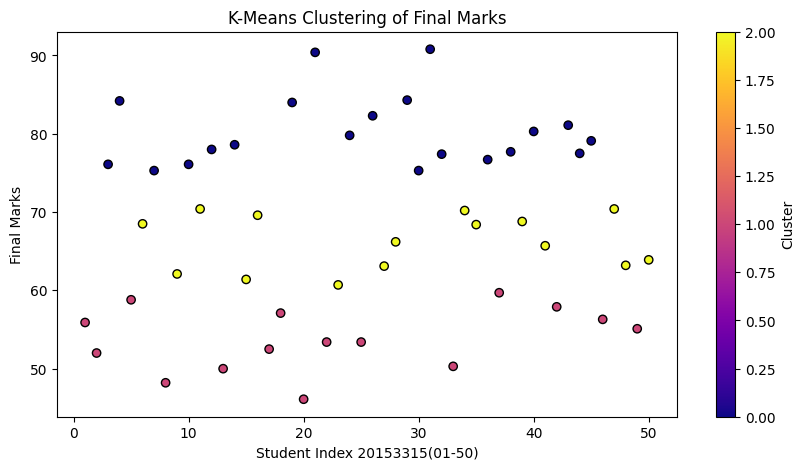

In [ ]:
# Visualization with formatted registration numbers and custom x-axis labels
plt.figure(figsize=(10, 5))
plt.scatter(range(1, len(final_df) + 1), final_df['Final Marks'], c=final_df['Cluster'], cmap='plasma', edgecolors='k')
plt.colorbar(label='Cluster')
plt.xlabel('Student Index 20153315(01-50)')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')